In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [184]:
#Loading and compiling dataset
df_schools = pd.read_csv("Masterlist of Schools.csv", index_col="school.id")

df_location = pd.read_csv("Schools Location Data.csv", 
                          encoding = "latin-1", 
                          index_col="School ID",
                          usecols=["School ID", "Enrolment", "Latitude", "Longitude"])

df_rooms = pd.read_csv('Rooms data.csv', index_col="School ID")

df_teachers = pd.read_csv("Teachers data.csv", index_col="school.id")

df_elementary = pd.read_csv("Enrollment Master Data_2015_E.csv")[:-1].astype(int).set_index("School ID")

df_secondary = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .replace("SPED NG Male", "SPED NG Male SS")
                  .replace("SPED NG Female", "SPED NG Female SS")
                  .set_index("School ID"))

df_mooe = (pd.read_csv('MOOE data.csv', index_col="school.id", usecols=["school.id", " school.mooe "])
             .replace(",", "", regex=True).astype(float))

In [3]:
#Saving all datasets into one data frame
df_all = pd.concat([df_schools, df_location, df_rooms, df_teachers, df_elementary, df_secondary, df_mooe], axis=1)
df_all

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male,SPED NG Female,school.mooe
100001,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,Apaleng-Libtong PS,100001.0,-,1/1/1996,Elementary,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,NaN,Partially Urban,90.0,18.253666,120.606180,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84000.0
100002,Bacarra CES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100002.0,Santa Rita,1/1/1914,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,456.0,18.250964,120.608958,12.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268000.0
100003,Buyon ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100003.0,NONE,1/1/1947,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,167.0,18.234599,120.616037,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0
100004,Ganagan ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,NaN,100004.0,NONE,1/1/1949,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,122.0,18.250014,120.587169,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116000.0
100005,Macupit ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100005.0,Macupit,1/1/1913,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,77.0,18.293994,120.641019,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,5.0,7.0,4.0,3.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326101,Upper Katungal National High School-TNHS Annex,Region XII,Soccsksargen,SULTAN KUDARAT,SULTAN KUDARAT,Tacurong City,CITY OF TACURONG,Tacurong South,1st District,Annex or Extension school(s),UKNHS-TNHS Annex,Tacurong NHS - Upper Katungal Annex,304624.0,Upper Katungal,1/1/2011,Secondary,DepED Managed,Secondary,Monograde,P 160 M or more but less than P 240 M,Compo

In [4]:
#Checking the shape
df_all.shape

(46751, 64)

In [5]:
#Checking for missing values
df_all.isna().sum()

school.name                     148
school.region                   148
school.region.name              148
school.province                 148
school.cityhall                 149
school.division                 148
school.citymuni                 148
school.district                 148
school.legdistrict              148
school.type                     148
school.abbrev                 28584
school.previousname            4530
school.mother.id                155
school.address                 2130
school.established              157
school.classification           148
school.classification2          148
school.curricularclass          148
school.organization             148
school.cityincome              1124
school.cityclass              38538
school.urban                    151
Enrolment                       127
Latitude                        130
Longitude                       130
rooms.standard.academic         339
rooms.standard.unused           339
rooms.nonstandard.academic  

In [9]:
#Checking for duplicates
df_all[df_all.index.duplicated(keep=False)]

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male,SPED NG Female,school.mooe


In [10]:
#Checking the columns
df_all.columns

Index(['school.name', 'school.region', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'Enrolment', 'Latitude',
       'Longitude', 'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped', 'Kinder Male', 'Kinder Female', 'Grade 1 Male',
       'Grade 1 Female', 'Grade 2 Male', 'Grade 2 Female', 'Grade 3 Male',
       'Grade 3 Female', 'Grade 4 Male', 'Grade 4 Female', 'Grade 5 Male',
       'Grade 5 Female', 'Grade 6 Male', 'Grade 6 Femal

Let's try to explore the data for both elementary and secondary school

In [185]:
# Obtain all numeric features and school.classification
df_numeric = df_all[['school.region', 'school.cityincome','rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped','Enrolment', ' school.mooe ', 'school.classification']]


In [186]:
# Combine all rooms and all teachers
df_numeric["rooms_total"] = (df_numeric['rooms.standard.academic'] + 
                             df_numeric['rooms.standard.unused'] + 
                             df_numeric['rooms.nonstandard.academic'] + 
                             df_numeric['rooms.nonstandard.unused'])

df_numeric["teachers_total"] = (df_numeric['teachers.instructor'] + 
                             df_numeric['teachers.mobile'] + 
                             df_numeric['teachers.regular'] + 
                             df_numeric['teachers.sped'])

df_numeric['student_teacher_ratio'] = df_numeric['Enrolment']/df_numeric["teachers_total"]
df_numeric['student_room_ratio'] = df_numeric['Enrolment']/df_numeric["rooms_total"]
df_numeric['student_mooe_ratio'] = df_numeric['Enrolment']/df_numeric[' school.mooe ']

df_numeric = df_numeric.dropna()

# Removing (statistical) outliers for MOOE
Q1 = df_numeric[' school.mooe '].quantile(0.25)
Q3 = df_numeric[' school.mooe '].quantile(0.75)
IQR = Q3 - Q1

df_outlier_removed = (df_numeric[(df_numeric[' school.mooe '] >= Q1 - 1.5*IQR) & 
                           (df_numeric[' school.mooe '] <= Q3 + 1.5*IQR)])
df_outlier_removed.columns

<ipython-input-186-b6c9f6a6ddf1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["rooms_total"] = (df_numeric['rooms.standard.academic'] +
<ipython-input-186-b6c9f6a6ddf1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["teachers_total"] = (df_numeric['teachers.instructor'] +
<ipython-input-186-b6c9f6a6ddf1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Index(['school.region', 'school.cityincome', 'rooms.standard.academic',
       'rooms.standard.unused', 'rooms.nonstandard.academic',
       'rooms.nonstandard.unused', 'teachers.instructor', 'teachers.mobile',
       'teachers.regular', 'teachers.sped', 'Enrolment', ' school.mooe ',
       'school.classification', 'rooms_total', 'teachers_total',
       'student_teacher_ratio', 'student_room_ratio', 'student_mooe_ratio'],
      dtype='object')

In [344]:
#Checking the dataset
df_numeric ["school.cityincome"] = df_numeric["school.cityincome"].replace(['P 55 M or more'],'P 55 M or more but less than P 80 M')
df_numeric

,school.region,school.cityincome,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Enrolment,school.mooe,school.classification,rooms_total,teachers_total,student_teacher_ratio,student_room_ratio,student_mooe_ratio,school.cityincome,mooe_per_student,rooms_per_city_income,teachers_per_city_income
100001,Region I,P 35 M or more but less than P 45 M,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,90.0,84000.0,Elementary,2.0,2.0,45.000000,45.000000,0.001071,P 35 M or more but less than P 45 M,933.333333,NaN,NaN
100002,Region I,P 35 M or more but less than P 45 M,12.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,456.0,268000.0,Elementary,12.0,17.0,26.823529,38.000000,0.001701,P 35 M or more but less than P 45 M,587.719298,NaN,NaN
100003,Region I,P 35 M or more but less than P 45 M,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,167.0,135000.0,Elementary,6.0,7.0,23.857143,27.833333,0.001237,P 35 M or more but less than P 45 M,808.383234,NaN,NaN
100004,Region I,P 35 M or more but less than P 45 M,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,122.0,116000.0,Elementary,6.0,7.0,17.428571,20.333333,0.001052,P 35 M or more but less than P 45 M,950.819672,NaN,NaN
100005,Region I,P 35 M or more but less than P 45 M,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,77.0,115000.0,Elementary,6.0,7.0,11.000000,12.833333,0.000670,P 35 M or more but less than P 45 M,1493.506494,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324101,Region I,P 240 M or more but less than P 320 M,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,192.0,169000.0,Secondary,2.0,1.0,192.000000,96.000000,0.001136,P 240 M or more but less than P 320 M,880.208333,NaN,NaN
324102,Region I,P 240 M or more but less than P 320 M,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,47.0,144000.0,Secondary,0.0,4.0,11.750000,inf,0.000326,P 240 M or more but less than P 320 M,3063.829787,NaN,NaN
325502,Region X,P 400 M or more,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,230.0,212000.0,Secondary,0.0,3.0,76.666667,inf,0.001085,P 400 M or more,921.739130,NaN,NaN
325901,Region IV-A,P 400 M or more,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1881.0,1281000.0,Secondary,8.0,0.0,inf,235.125000,0.001468,P 400 M or more,681.020734,NaN,NaN


In [350]:
#reordering categories
df_numeric["school.cityincome"] = df_numeric["school.cityincome"].astype('category')
df_numeric["school.cityincome"].cat.reorder_categories(['Below P 15 M', 'P 15 M or more but less than P 25 M', 
       'P 25 M or more but less than P 35 M',
       'P 35 M or more but less than P 45 M',
       'P 45 M or more but less than P 55 M',
       'P 55 M or more but less than P 80 M',
       'P 80 M or more but less than P 160 M',                                                 
       'P 160 M or more but less than P 240 M',
       'P 240 M or more but less than P 320 M',
       'P 320 M or more but less than P 400 M',
       'P 400 M or more',
       'Special Class'])

100001      P 35 M or more but less than P 45 M
100002      P 35 M or more but less than P 45 M
100003      P 35 M or more but less than P 45 M
100004      P 35 M or more but less than P 45 M
100005      P 35 M or more but less than P 45 M
                          ...                  
324101    P 240 M or more but less than P 320 M
324102    P 240 M or more but less than P 320 M
325502                          P 400 M or more
325901                          P 400 M or more
325902                          P 400 M or more
Name: school.cityincome, Length: 41570, dtype: category
Categories (12, object): ['Below P 15 M' < 'P 15 M or more but less than P 25 M' < 'P 25 M or more but less than P 35 M' < 'P 35 M or more but less than P 45 M' ... 'P 240 M or more but less than P 320 M' < 'P 320 M or more but less than P 400 M' < 'P 400 M or more' < 'Special Class']

In [351]:
#Getting the no. of students per city classified by income
students_per_city_income = df_numeric.groupby("school.cityincome").agg(Enrolment=("Enrolment", sum))
students_per_city_income

,Enrolment
school.cityincome,
Below P 15 M,27353.0
P 15 M or more but less than P 25 M,818552.0
P 25 M or more but less than P 35 M,2054566.0
P 35 M or more but less than P 45 M,2059665.0
P 45 M or more but less than P 55 M,1850198.0
P 55 M or more but less than P 80 M,5705329.0
P 80 M or more but less than P 160 M,26446.0
P 160 M or more but less than P 240 M,580948.0
P 240 M or more but less than P 320 M,924445.0


<function matplotlib.pyplot.show(close=None, block=None)>

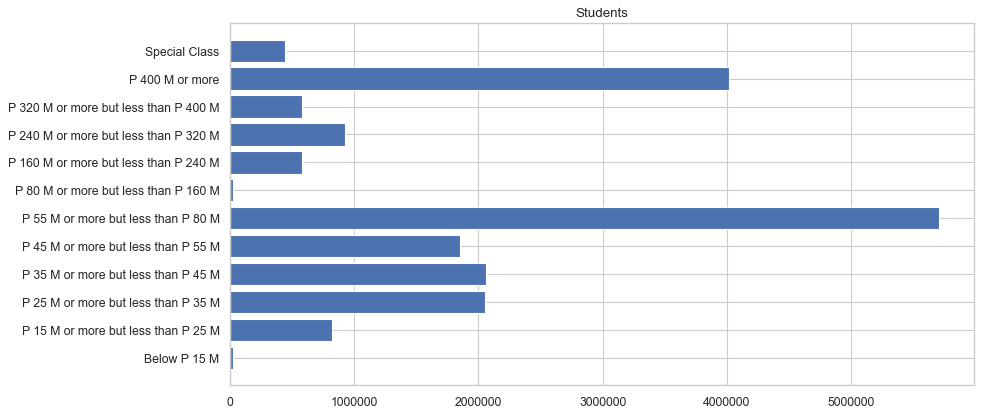

In [347]:
#Plotting the bar graph for students per city classified by income
plt.figure(figsize=(12,6), dpi = 80)
plt.barh(students_per_city_income.index, students_per_city_income["Enrolment"].values)
plt.title("Students")
plt.ticklabel_format(axis="x", style="plain")
plt.show

In [282]:
#Getting the no. of teachers per city classified by income
teachers_per_city_income = df_numeric.groupby("school.cityincome").agg(Teachers=("teachers_total", sum))
teachers_per_city_income

,Teachers
school.cityincome,
Below P 15 M,1079.0
P 15 M or more but less than P 25 M,26878.0
P 25 M or more but less than P 35 M,61405.0
P 35 M or more but less than P 45 M,59229.0
P 45 M or more but less than P 55 M,49568.0
P 55 M or more but less than P 80 M,143348.0
P 80 M or more but less than P 160 M,896.0
P 160 M or more but less than P 240 M,16800.0
P 240 M or more but less than P 320 M,25316.0


<function matplotlib.pyplot.show(close=None, block=None)>

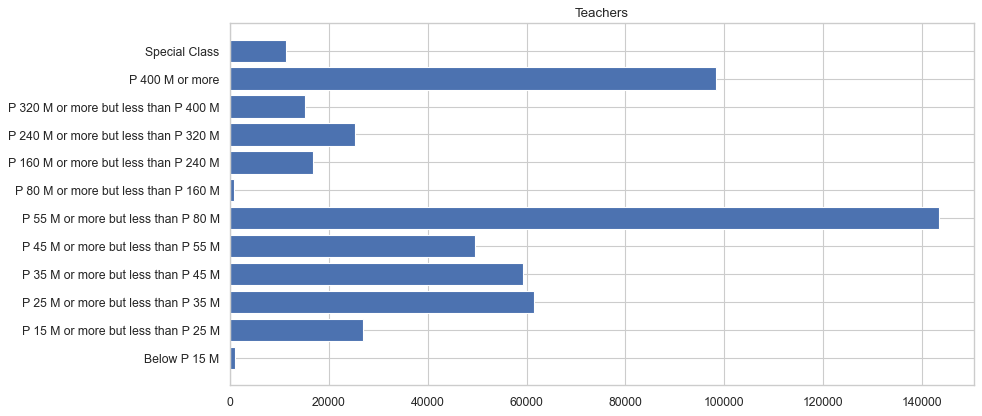

In [339]:
#Plotting the bar graph for teachers per city classified by income
plt.figure(figsize=(12,6), dpi = 80)
plt.barh(teachers_per_city_income.index, teachers_per_city_income["Teachers"].values)
plt.title("Teachers")
plt.ticklabel_format(axis="x", style="plain")
plt.show

In [284]:
#Getting the no. of rooms per city classified by income
rooms_per_city_income = df_numeric.groupby("school.cityincome").agg(Rooms=("rooms_total", sum))
rooms_per_city_income

,Rooms
school.cityincome,
Below P 15 M,890.0
P 15 M or more but less than P 25 M,22903.0
P 25 M or more but less than P 35 M,51830.0
P 35 M or more but less than P 45 M,50055.0
P 45 M or more but less than P 55 M,41541.0
P 55 M or more but less than P 80 M,114994.0
P 80 M or more but less than P 160 M,714.0
P 160 M or more but less than P 240 M,13115.0
P 240 M or more but less than P 320 M,19438.0


<function matplotlib.pyplot.show(close=None, block=None)>

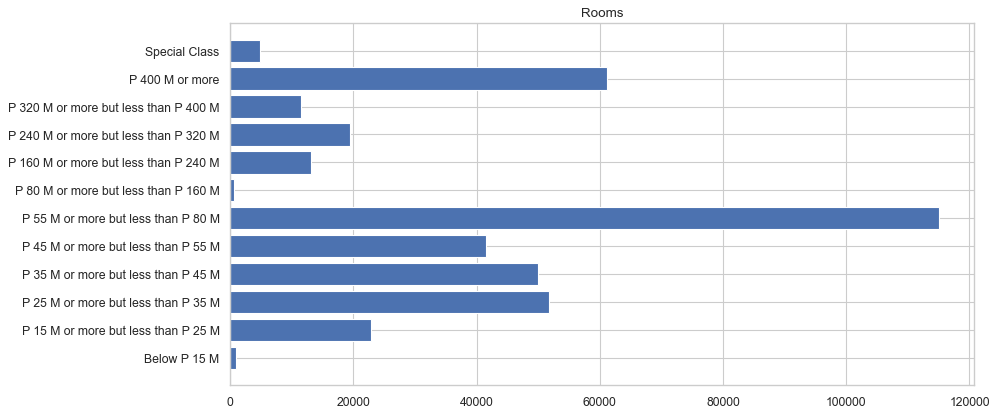

In [338]:
#Plotting the bar graph for rooms per city classified by income
plt.figure(figsize=(12,6), dpi=80)
plt.barh(rooms_per_city_income.index, rooms_per_city_income["Rooms"].values)
plt.title("Rooms")
plt.ticklabel_format(axis="x", style="plain")
plt.show

In [286]:
#Getting the total MOOE per city classified by income
mooe_per_city_income = df_numeric.groupby("school.cityincome").agg(MOOE_per_city_income=(" school.mooe ",sum))
mooe_per_city_income

,MOOE_per_city_income
school.cityincome,
Below P 15 M,2.811300e+07
P 15 M or more but less than P 25 M,6.695210e+08
P 25 M or more but less than P 35 M,1.543636e+09
P 35 M or more but less than P 45 M,1.485350e+09
P 45 M or more but less than P 55 M,1.274195e+09
P 55 M or more but less than P 80 M,3.646210e+09
P 80 M or more but less than P 160 M,2.021200e+07
P 160 M or more but less than P 240 M,3.916530e+08
P 240 M or more but less than P 320 M,6.054300e+08


<function matplotlib.pyplot.show(close=None, block=None)>

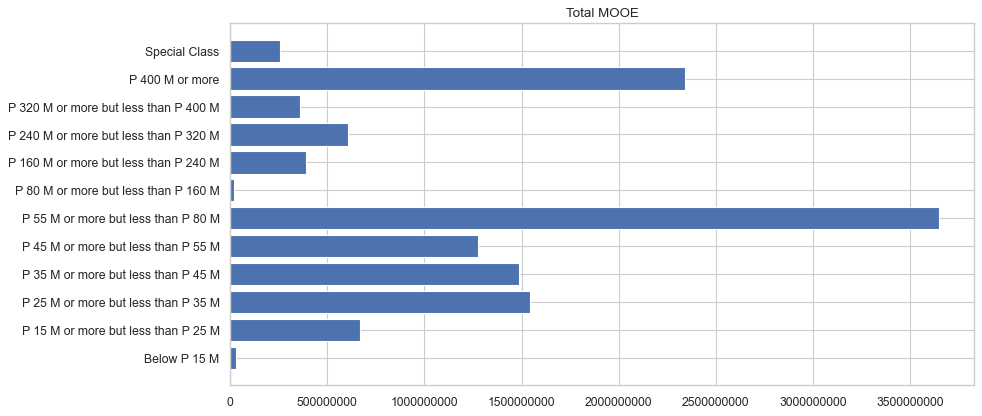

In [342]:
#Plotting the bar graph for total MOOE per city classified by income
plt.figure(figsize=(12,6), dpi = 80)
plt.barh(mooe_per_city_income.index, mooe_per_city_income ["MOOE_per_city_income"].values)
plt.title("Total MOOE")
plt.ticklabel_format(axis="x", style="plain")
plt.show